In [1]:
import pandas as pd
import pandas_datareader.data as web
import requests
from io import StringIO
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import pandas_profiling

import copy

sns.set()

In [2]:
### 2012年後的財務分析資料無 “獲利能力-營業利益佔實收資本比率(%)” 此欄位
df = pd.DataFrame()

for y in range(2018,2008,-1):
    df_tmp = pd.read_csv('./Financial-analysis-report/%d.csv' %(y))
    # df_tmp['年份'] = y
    # df_tmp.set_index('年份',inplace=True, drop=True)
    df_tmp = df_tmp.loc[df_tmp['公司代號'] == 1210]
    if y<=2012:
        df_tmp.rename(columns={'財務結構-長期資金佔固定資產比率(%)':'財務結構-長期資金佔不動產、廠房及設備比率(%)'}, inplace=True)
        df_tmp.rename(columns={'經營能力->應收款項收現日數':'經營能力-平均收現日數'}, inplace=True)
        df_tmp.rename(columns={'經營能力-固定資產週轉率(次)':'經營能力-不動產、廠房及設備週轉率(次)'}, inplace=True)
        df_tmp.rename(columns={'獲利能力-股東權益報酬率(%)':'獲利能力-權益報酬率(%)'}, inplace=True)
        
    df_tmp = df_tmp.T
    
    df['%d'%(y)] = df_tmp[df_tmp.columns[0]]

df = df.T
for col in df.columns:
    df[col] = pd.to_numeric(df[col], 'coerce')
    
df.drop(['公司代號', '公司簡稱'], axis=1, inplace=True)
df.rename(columns={'現金流量-現金再投<br>資比率(%)':'現金流量-現金再投資比率(%)'}, inplace=True)
df.index = pd.to_datetime(df.index)  
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
df = df.sort_index()

(df.style.background_gradient(cmap='Blues')
                    .highlight_null())


,財務結構-負債佔資產比率(%),財務結構-長期資金佔不動產、廠房及設備比率(%),償債能力-流動比率(%),償債能力-速動比率(%),償債能力-利息保障倍數(%),經營能力-應收款項週轉率(次),經營能力-平均收現日數,經營能力-存貨週轉率(次),經營能力-平均售貨日數,經營能力-不動產、廠房及設備週轉率(次),經營能力-總資產週轉率(次),獲利能力-資產報酬率(%),獲利能力-權益報酬率(%),獲利能力-稅前純益佔實收資本比率(%),獲利能力-純益率(%),獲利能力-每股盈餘(元),現金流量-現金流量比率(%),現金流量-現金流量允當比率(%),現金流量-現金再投資比率(%)
2009,33.33,459.47,147.11,84.87,34.2,8.47,43.09,10.31,35.4,8.47,1.42,8.46,12.59,30.17,5.67,2.63,45.66,122.04,6.62
2010,37.08,423.83,123.86,71.24,31.59,8.83,41.33,9.27,39.37,7.86,1.33,7.38,11.1,24.52,5.14,2.36,17.28,50.35,1.28
2011,37.91,405.06,104.73,63.1,23.87,9.15,39.89,9.46,38.58,7.82,1.32,6.65,10.27,22.42,4.64,2.22,10.72,45.87,0
2012,38.63,393.81,107.88,67.52,13.68,8.91,40.96,9.36,38.99,7.53,1.28,4.4,6.61,15.19,3.11,1.43,11.86,57.34,0.53
2013,51.15,198.67,141.61,79.33,12.78,16.1,22.67,9.55,38.21,8.01,2.47,6.61,12.64,45.78,2.49,3.42,30,157.62,17.9
2014,51.82,186.83,136.03,76.94,6.42,15.97,22.85,9.69,37.66,7.28,2.3,2.99,5.16,20.26,1.09,1.7,14.98,80.19,8.24
2015,51.91,190.32,123.09,73.88,4.41,8.48,43.04,8.56,42.64,6.12,1.92,1.64,2.48,13.15,0.62,0.87,18.7,116.7,11.96
2016,46.7,184.89,123.35,70.26,9.65,8.07,45.22,8.56,42.64,6.3,1.95,7.27,13,42.65,3.38,3.01,25.08,179.36,18.32
2017,46.69,184.22,131.49,75.7,12.05,7.75,47.09,8.24,44.29,6,1.93,7.33,12.66,45.35,3.49,3.28,28.29,109.79,15.82
2018,47.74,177.82,125.42,68,9.83,11.8,30.93,7.18,50.83,5.19,1.74,6.41,10.98,38.47,3.33,2.75,11.37,93.37,2.38


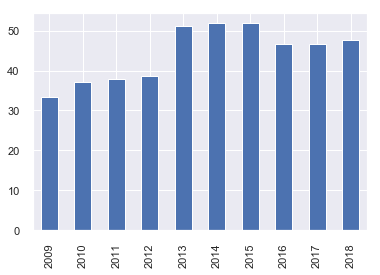

In [3]:
df['財務結構-負債佔資產比率(%)'].plot(kind='bar')